# Projet 6 :

# Test de l’API


https://rapidapi.com/edamam/api/edamam-food-and-grocery-database

https://developer.edamam.com/food-database-api-docs

La documentation de l'API de la base de données alimentaires d'Edamam offre plusieurs informations, notamment sur les produits et la tarification. L'API permet aux utilisateurs de rechercher des aliments par mot-clé, nom d'aliment ou code-barres, d'obtenir des informations nutritionnelles spécifiques, de filtrer les aliments par quantité de nutriments ou marque...

Dans la section "Response Guide" de la documentation, vous trouverez des détails sur la réponse renvoyée par l'API. La section "Parsed" présente les principales informations concernant l'aliment recherché, y compris les données nutritionnelles détaillées qui peuvent être obtenues via l'endpoint "/nutrients". Quant à la section "Hints", elle offre des résultats de recherche supplémentaires pour l'aliment identifié, accompagnés de leurs données nutritionnelles et des mesures correspondantes.

La fonctionnalité de pagination est prise en charge pour faciliter l'accès aux pages suivantes des résultats. Les catégories et les étiquettes diététiques sont utilisées pour affiner les résultats de recherche, et la réponse de l'API inclut les mesures spécifiques des aliments, ainsi qu'une liste de mesures standard prises en charge.

La documentation décrit également la structure des ingrédients, ainsi que la génération d'étiquettes diététiques et d'étiquettes de santé basées sur les informations nutritionnelles et les ingrédients des recettes. En outre, les types de repas et les types de plats sont répertoriés pour une classification améliorée des recettes.

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import requests

# URL de l'API Edamam
url = 'https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser'

# Paramètres de requête pour l'API Edamam
querystring = {
    "ingr": "champagne"
}

# Headers pour l'API Edamam (clés d'authentification)
headers = {
    "X-RapidAPI-Key": "53735d81c7mshae5f3f2a0a254bap1aef68jsn6569bf031ba5",
    "X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com"
}

# Envoyer une requête GET à l'API Edamam
response = requests.get(url, headers=headers, params=querystring)

# Vérifier si la requête a réussi (code de statut 200)
if response.status_code == 200:
    # Convertir la réponse au format JSON
    api_response = response.json()

    data_api = []
    # Parcourir les 10 premiers produits dans la réponse
    for product in api_response['hints'][:10]:
        food = product['food']
        # Extraire les informations souhaitées pour chaque produit
        data_api.append({
            'foodId': food['foodId'],
            'label': food['label'],
            'category': food['category'],
            'foodContentsLabel': food.get('foodContentsLabel', ''),
            'image': food.get('image', '')
        })

    # Créer un DataFrame à partir des données extraites
    df_api = pd.DataFrame(data_api, columns=['foodId', 'label', 'category', 'foodContentsLabel', 'image'])
    
    # Enregistrer le DataFrame dans un fichier CSV
    df_api.to_csv('products.csv', index=False)
    
    print("Extraction des 10 premiers produits effectuée et stockée dans 'products.csv'.")
else:
    
    # En cas d'erreur dans la requête, afficher le code de statut de la réponse
    print("Erreur lors de la requête API:", response.status_code)


Extraction des 10 premiers produits effectuée et stockée dans 'products.csv'.


In [3]:

# vérifier le contenu de api_response
api_response


{'text': 'champagne',
 'parsed': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}}],
 'hints': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'},
   'measures': [{'uri': '

In [4]:
df_api

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,
7,food_byap67hab6evc3a0f9w1oag3s0qf,Champagne Sorbet,Generic meals,Sugar; Lemon juice; brandy; Champagne; Peach,
8,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,
9,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,


Affichage du dataset :
                              foodId                             label  \
0  food_a656mk2a5dmqb2adiamu6beihduu                         Champagne   
1  food_b753ithamdb8psbt0w2k9aquo06c  Champagne Vinaigrette, Champagne   
2  food_b3dyababjo54xobm6r8jzbghjgqe  Champagne Vinaigrette, Champagne   
3  food_a9e0ghsamvoc45bwa2ybsa3gken9  Champagne Vinaigrette, Champagne   
4  food_an4jjueaucpus2a3u1ni8auhe7q9  Champagne Vinaigrette, Champagne   
5  food_bmu5dmkazwuvpaa5prh1daa8jxs0     Champagne Dressing, Champagne   
6  food_alpl44taoyv11ra0lic1qa8xculi             Champagne Buttercream   
7  food_byap67hab6evc3a0f9w1oag3s0qf                  Champagne Sorbet   
8  food_am5egz6aq3fpjlaf8xpkdbc2asis                Champagne Truffles   
9  food_bcz8rhiajk1fuva0vkfmeakbouc0             Champagne Vinaigrette   

         category                                  foodContentsLabel  \
0   Generic foods                                                NaN   
1  Packaged foods 

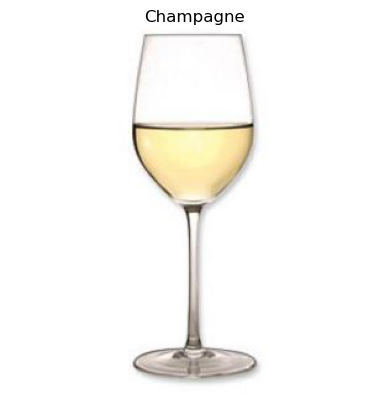

Image non disponible pour le produit : Champagne Vinaigrette, Champagne


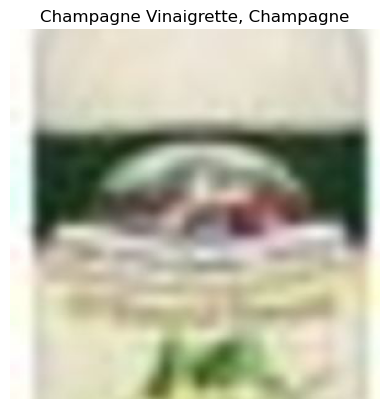

Image non disponible pour le produit : Champagne Vinaigrette, Champagne
Image non disponible pour le produit : Champagne Vinaigrette, Champagne


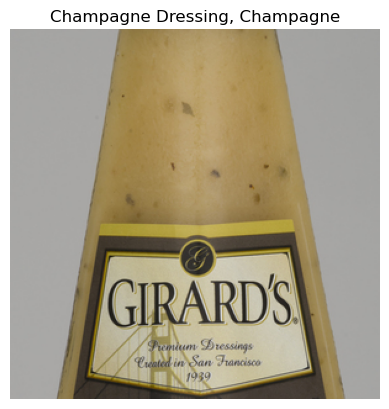

Image non disponible pour le produit : Champagne Buttercream
Image non disponible pour le produit : Champagne Sorbet
Image non disponible pour le produit : Champagne Truffles
Image non disponible pour le produit : Champagne Vinaigrette


In [5]:
# Chargement du fichier CSV contenant les données des produits
df_api = pd.read_csv('products.csv')

# Affichage du dataset
print("Affichage du dataset :")
print(df_api)

# Affichage des images des produits
print("Affichage des images des produits :")
for index, row in df_api.iterrows():
    if pd.notnull(row['image']):
        response = requests.get(row['image'], stream=True)
        if response.status_code == 200:
            image = Image.open(response.raw)
            plt.imshow(image)
            plt.title(row['label'])
            plt.axis('off')
            plt.show()
        else:
            print(f"Erreur lors de la récupération de l'image pour le produit : {row['label']}")
    else:
        print(f"Image non disponible pour le produit : {row['label']}")
